In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from random import random
# For plotting Gaussian contours
from plotting_util import plot_gaussian_from_points
from plotting_util import plot_gaussian_from_parameters
import pandas as pd

from numpy.linalg import inv
import scipy.stats as stats

import time 



In [2]:
def sampling_s_ty(sigma_O, mu_s, sigma_s, t):
    ### sampling variable s=s1,s2 from condtion t and y(eliminated in this case)
    ### Input: sigma_O, mu_s, sigma_s, t
    ### Ontput: one vrs with Gaussian(mu_s_ty, sigma_s_ty)
    A = np.array([[1,-1]])
    sigma_s_ty = inv(inv(sigma_s) + A.T * (1/sigma_O) @ A)
    mu_s_ty = sigma_s_ty @ (inv(sigma_s) @ mu_s + A.T * (1/sigma_O) * t)
    
    return stats.multivariate_normal.rvs(mu_s_ty.reshape(-1), sigma_s_ty)

In [3]:
def sampling_t_sy(y, s_1, s_2, sigma_O):
    ### sampling variable t from condtion =s1,s2 and y
    ### Input: y, s_1, s_2, sigma_O
    ### Ontput: one vrs with truncated Gaussian(a, b, loc, scale)
    loc = s_1 - s_2
    scale = sigma_O
    if y == 1:
        myclip_a = 0
        myclip_b = np.Inf
    elif y== -1:
        myclip_a = -np.Inf
        myclip_b = 0
    
    a, b = (myclip_a - loc) / scale, (myclip_b - loc) / scale
    return stats.truncnorm.rvs(a, b, loc, scale)

In [4]:
def GibbsSampling(initial_point, y, mu_s, sigma_s, sigma_O, num_samples):
    ### Input: initial points for s_1, s_2, y, mu_s, sigma_s, sigma_O, num_samples
    ### Output: samples for s_1 and s_2
    samples_s_1 = []
    samples_s_2 = []
    s_1 = initial_point[0]
    s_2 = initial_point[1]
    for i in range(num_samples):
        t = sampling_t_sy(y, s_1, s_2, sigma_O)
        s_1,s_2 = sampling_s_ty(sigma_O, mu_s, sigma_s, t)
        samples_s_1.append(s_1)
        samples_s_2.append(s_2)
    return samples_s_1,samples_s_2

In [5]:
s0 = [0,0]
num_samples = 1000
y = 1
mu_s = np.array([[1, 1]]).T
sigma_s = np.array([[1,0],[0,1]])
sigma_O = np.array([1])

t0 = time.time()
vec_s1, vec_s2 = GibbsSampling(s0, y, mu_s, sigma_s, sigma_O, num_samples)
t = int((time.time() - t0) * 1000)


1.4799069232744095
0.5682739353402875


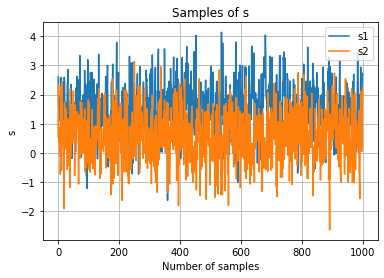

In [6]:
plt.grid()
plt.plot(vec_s1)
plt.plot(vec_s2)
plt.xlabel("Number of samples")
plt.ylabel("s")
plt.title("Samples of s")
print(np.mean(vec_s1))
print(np.mean(vec_s2))
plt.legend(['s1', 's2'], loc='upper right')

1.4784098486433304
0.5684013754994754


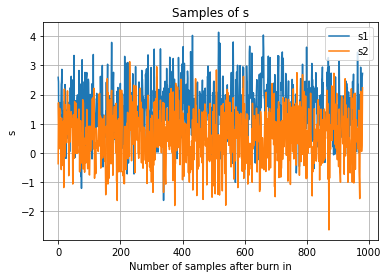

In [7]:
burn = 20
burn_vec_s1 = vec_s1[burn:]
burn_vec_s2 = vec_s2[burn:]

plt.grid()
plt.plot(burn_vec_s1)
plt.plot(burn_vec_s2)
plt.xlabel("Number of samples after burn in")
plt.ylabel("s")
plt.title("Samples of s")
print(np.mean(burn_vec_s1))
print(np.mean(burn_vec_s2))
plt.legend(['s1', 's2'], loc='upper right')

In [8]:
def cvrt_gaussian(s, mean, var, num_samples, burn):
    
    x = np.linspace(mean - var * 3, mean + var * 3, num_samples - burn)
    y = stats.norm.pdf(x, loc=mean, scale=var)
    plt.plot(x, y)
    plt.hist(s, bins=20, density=True, color='lightblue')
    plt.grid()
    plt.title("number_samples=" + str(num_samples) + "," + "(" + str(t) + " ms)")
    

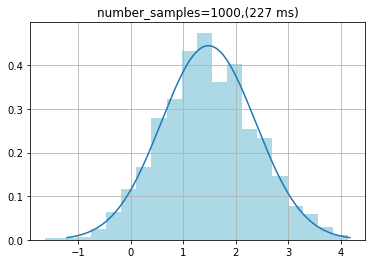

In [9]:
cvrt_gaussian(burn_vec_s1, np.mean(burn_vec_s1), np.std(burn_vec_s1), num_samples, burn)

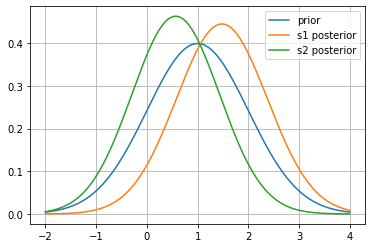

In [10]:
# Calculate the parameters of the approximated pdfs
s1_mean = np.mean(burn_vec_s1)
s1_std = np.std(burn_vec_s1)
s2_mean = np.mean(burn_vec_s2)
s2_std = np.std(burn_vec_s2)
    
# Plot the pdfs
x = np.linspace(1 - 1 * 3, 1 + 1 * 3, num_samples - burn)
plt.plot(x, stats.norm.pdf(x, loc=1, scale=1), label="prior")
plt.plot(x, stats.norm.pdf(x, loc=s1_mean, scale=s1_std), label="s1 posterior")
plt.plot(x, stats.norm.pdf(x, loc=s2_mean, scale=s2_std), label="s2 posterior")
plt.grid()
plt.legend()
plt.show()


# SerieA Task

In [180]:
import pandas as pd
# df = pd.read_csv ('SerieA.csv')
df = pd.read_csv ('england-premier-league-2020-2021.csv')
df

DATE  COUNTRY          LEAGUE    TYPE     SEASON  \
0    2020-09-12  England  Premier League  LEAGUE  2020/2021   
1    2020-09-12  England  Premier League  LEAGUE  2020/2021   
2    2020-09-12  England  Premier League  LEAGUE  2020/2021   
3    2020-09-12  England  Premier League  LEAGUE  2020/2021   
4    2020-09-13  England  Premier League  LEAGUE  2020/2021   
..          ...      ...             ...     ...        ...   
375  2021-05-23  England  Premier League  LEAGUE  2020/2021   
376  2021-05-23  England  Premier League  LEAGUE  2020/2021   
377  2021-05-23  England  Premier League  LEAGUE  2020/2021   
378  2021-05-23  England  Premier League  LEAGUE  2020/2021   
379  2021-05-23  England  Premier League  LEAGUE  2020/2021   

                HOME_TEAM         AWAY_TEAM FTR  FTHG  FTAG  ... H_YC  H_RC  \
0                  Fulham           Arsenal   A     0     3  ...    2     0   
1               Liverpool      Leeds United   H     4     3  ...    1     0   
2          Crystal Palace       Southampton   H     1     0  ...    2     0   
3         West Ham United  Newcastle United   A     0     2  ...    2     0   
4    West Bromwich Albion    Leicester City   A     0     3  ...    1     0   
..                    ...               ...  ..   ...   ...  ...  ...   ...   
375           Aston Villa           Chelsea   H     2     1  ...    3     0   
376             Liverpool    Crystal Palace   H     2     0  ...    2     0   
377      Sheffield United           Burnley   H     1     0  ...    3     0   
378                Fulham  Newcastle United   A     0     2  ...    1     0   
379       West Ham United       Southampton   H     3     0  ...    0     0   

     A_ST  A_SOG  A_SFG  A_PT  A_COR  A_FL  A_YC  A_RC  
0      13      5      8    55      3     8     2     0  
1       6      3      3    52      0     6     0     0  
2       8      5      3    71      3    11     1     0  
3      15      2      7    42      7     7     2     0  
4      13      7      6    65      5     9     1     0  
..    ...    ...    ...   ...    ...   ...   ...   ...  
375    24      7     17    72      9    13     4     1  
376     5      4      1    31      1     8     2     0  
377     8      3      5    57      9     2     1     0  
378    10      4      6    36      4     8     0     0  
379    18      2     16    64      3     9     3     0  

[380 rows x 35 columns]

In [181]:
# cols = ['team1', 'team2', 'score1', 'score2']

cols = ['HOME_TEAM', 'AWAY_TEAM', 'FTHG' ,'FTAG']
df = df[cols]
df.rename(columns = {'HOME_TEAM':'team1', 'AWAY_TEAM':'team2', 'FTHG':'score1', 'FTAG': 'score2'}, inplace = True)
df.head()

C:\Users\jingkai\AppData\Local\Temp\ipykernel_44864\2090045678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'HOME_TEAM':'team1', 'AWAY_TEAM':'team2', 'FTHG':'score1', 'FTAG': 'score2'}, inplace = True)


team1             team2  score1  score2
0                Fulham           Arsenal       0       3
1             Liverpool      Leeds United       4       3
2        Crystal Palace       Southampton       1       0
3       West Ham United  Newcastle United       0       2
4  West Bromwich Albion    Leicester City       0       3

In [182]:
team1 = set(df['team1'])
team2 = set(df['team2'])
teams = team1.union(team2)

# convert team's name into indices
name_dictionary = dict(zip(teams, range(len(teams))))
print(name_dictionary)

# create skill list [[mean_0,var_0], [mean_1, var_1]...]
skill_list = np.ones((len(teams), 2))


{'Arsenal': 0, 'Leicester City': 1, 'West Bromwich Albion': 2, 'Tottenham Hotspur': 3, 'Brighton & Hove Albion': 4, 'Southampton': 5, 'Fulham': 6, 'Crystal Palace': 7, 'Newcastle United': 8, 'Manchester City': 9, 'Leeds United': 10, 'Aston Villa': 11, 'Burnley': 12, 'Sheffield United': 13, 'Chelsea': 14, 'Manchester United': 15, 'Wolverhampton Wanderers': 16, 'Everton': 17, 'West Ham United': 18, 'Liverpool': 19}


In [183]:
# shuffle

# df = df.sample(frac=1, replace=True, random_state=1).reset_index(drop=True)
# df = df[cols]
# df.head()

In [184]:
s0 = [0,0]
num_samples = 750
sigma_O = np.array([1])
burn = 20



for i in range(len(df)):
    team1 = df.iloc[i,0] # name in str
    team2 = df.iloc[i,1]
    score1 = df.iloc[i,2] # score in int
    score2 = df.iloc[i,3]
    prior1 = skill_list[name_dictionary[team1]]
    prior2 = skill_list[name_dictionary[team2]]
    mu_s = np.array([[prior1[0], prior2[0]]]).T
    sigma_s = np.array([[prior1[1],0],[0,prior2[1]]])
    
    if score1 > score2:
        y = 1
        vec_s1, vec_s2 = GibbsSampling(s0, y, mu_s, sigma_s, sigma_O, num_samples)
        vec_s1 = vec_s1[burn:]
        vec_s2 = vec_s2[burn:]
        posterior1 = [np.mean(vec_s1), np.var(vec_s1)]
        posterior2 = [np.mean(vec_s2), np.var(vec_s2)]
    elif score1 < score2:
        y = -1
        vec_s1, vec_s2 = GibbsSampling(s0, y, mu_s, sigma_s, sigma_O, num_samples)
        vec_s1 = vec_s1[burn:]
        vec_s2 = vec_s2[burn:]
        posterior1 = [np.mean(vec_s1), np.var(vec_s1)]
        posterior2 = [np.mean(vec_s2), np.var(vec_s2)]
    else:
        posterior1 = prior1
        posterior2 = prior2
    
    skill_list[name_dictionary[team1]] = posterior1
    skill_list[name_dictionary[team2]] = posterior2
    
    

In [186]:
skill_team = dict(zip(teams, skill_list[:,0]))

# saving ranking 20/21
skill_team20_21 = skill_team
skill_team20_21

# sort dictionary by values in reverse order
ranking20_21 = dict(sorted(skill_team20_21.items(), key=lambda item: item[1], reverse=True))

ranking20_21 = pd.DataFrame.from_dict(ranking20_21, orient='index')
ranking20_21

0
Manchester City          1.975337
Manchester United        1.892132
Liverpool                1.691061
West Ham United          1.443039
Chelsea                  1.425039
Leicester City           1.399885
Arsenal                  1.197380
Tottenham Hotspur        1.184496
Leeds United             1.150809
Aston Villa              1.111057
Everton                  1.087706
Newcastle United         0.783054
Brighton & Hove Albion   0.774816
Wolverhampton Wanderers  0.715468
Southampton              0.600234
Burnley                  0.582878
Crystal Palace           0.552137
Fulham                   0.153794
Sheffield United         0.085940
West Bromwich Albion     0.043369

In [187]:
# do the predictions

df = pd.read_csv ('england-premier-league-2021-2022.csv')
cols = ['HOME_TEAM', 'AWAY_TEAM', 'FTHG' ,'FTAG']
df = df[cols]
df.rename(columns = {'HOME_TEAM':'team1', 'AWAY_TEAM':'team2', 'FTHG':'score1', 'FTAG': 'score2'}, inplace = True)
df.head()



team1                    team2  score1  score2
0          Brentford                  Arsenal       2       0
1            Everton              Southampton       3       1
2       Norwich City                Liverpool       0       3
3     Leicester City  Wolverhampton Wanderers       1       0
4  Manchester United             Leeds United       5       1

In [188]:
skill_team

{'Arsenal': 1.197379806599513,
 'Leicester City': 1.399884527231604,
 'West Bromwich Albion': 0.04336858675715188,
 'Tottenham Hotspur': 1.1844957377811816,
 'Brighton & Hove Albion': 0.7748162973529064,
 'Southampton': 0.6002339716256431,
 'Fulham': 0.15379365060899922,
 'Crystal Palace': 0.552137492017703,
 'Newcastle United': 0.7830538442493256,
 'Manchester City': 1.975337298302185,
 'Leeds United': 1.1508092302676731,
 'Aston Villa': 1.1110567908197857,
 'Burnley': 0.5828775329663226,
 'Sheffield United': 0.08593968275053526,
 'Chelsea': 1.4250390542838929,
 'Manchester United': 1.8921316231346432,
 'Wolverhampton Wanderers': 0.7154684419993144,
 'Everton': 1.0877055513711928,
 'West Ham United': 1.44303861001124,
 'Liverpool': 1.6910611970838678}

In [189]:
# inherinting
skill_team['Norwich City'] = skill_team.pop('Fulham')
skill_team['Watford'] = skill_team.pop('Sheffield United')
skill_team['Brentford'] = skill_team.pop('West Bromwich Albion')

# update name)dict
team1 = set(df['team1'])
team2 = set(df['team2'])
teams = team1.union(team2)
print(teams)

# convert team's name into indices
name_dictionary = dict(zip(teams, range(len(teams))))

{'Arsenal', 'Leicester City', 'Tottenham Hotspur', 'Brighton & Hove Albion', 'Southampton', 'Brentford', 'Norwich City', 'Watford', 'Newcastle United', 'Crystal Palace', 'Manchester City', 'Aston Villa', 'Burnley', 'Leeds United', 'Chelsea', 'Manchester United', 'Wolverhampton Wanderers', 'Everton', 'West Ham United', 'Liverpool'}


In [190]:
def predictor(mu_s, sigma_s, draw_threshold):
    # mu_s in shape (1,2), sigma_s in shape (2,2)
    s1_pred = np.random.normal(mu_s[0], np.sqrt(sigma_s[0][0]), 50)
    s2_pred = np.random.normal(mu_s[1], np.sqrt(sigma_s[1][1]), 50)
    t_pred =  np.mean(s1_pred-s2_pred)
    if draw_threshold > abs(t_pred):
        t_pred = 0
    
    y_pred = np.sign(t_pred)
    return y_pred

In [191]:
### In this cell, the only difference is to insert one prediction step.

# initialize priors
# skill_list = np.ones((len(teams), 2))

# hyperparameters
s0 = [0,0]
num_samples = 750
sigma_O = np.array([1])
burn = 20
draw_threshold = 0.04

# create pred_
predictions = [] 


for i in range(len(df)):
    team1 = df.iloc[i,0] # name in str
    team2 = df.iloc[i,1]
    score1 = df.iloc[i,2] # score in int
    score2 = df.iloc[i,3]
    prior1 = skill_list[name_dictionary[team1]]
    prior2 = skill_list[name_dictionary[team2]]
    mu_s = np.array([[prior1[0], prior2[0]]]).T
    sigma_s = np.array([[prior1[1],0],[0,prior2[1]]])
    
    predictions.append(predictor(mu_s, sigma_s, draw_threshold))
    
    if score1 > score2:
        y = 1
        vec_s1, vec_s2 = GibbsSampling(s0, y, mu_s, sigma_s, sigma_O, num_samples)
        vec_s1 = vec_s1[burn:]
        vec_s2 = vec_s2[burn:]
        posterior1 = [np.mean(vec_s1), np.var(vec_s1)]
        posterior2 = [np.mean(vec_s2), np.var(vec_s2)]
    elif score1 < score2:
        y = -1
        vec_s1, vec_s2 = GibbsSampling(s0, y, mu_s, sigma_s, sigma_O, num_samples)
        vec_s1 = vec_s1[burn:]
        vec_s2 = vec_s2[burn:]
        posterior1 = [np.mean(vec_s1), np.var(vec_s1)]
        posterior2 = [np.mean(vec_s2), np.var(vec_s2)]
    else:
        posterior1 = prior1
        posterior2 = prior2
    
    skill_list[name_dictionary[team1]] = posterior1
    skill_list[name_dictionary[team2]] = posterior2

In [192]:
# true values
y_true = []
for i in range(len(df)):
    
    score1 = df.iloc[i,2] # score in int
    score2 = df.iloc[i,3]
    
    if score1 > score2:
        y_true.append(1)
        
    elif score1 < score2:
        y_true.append(-1)
    else:
        y_true.append(0)
        
y_true

[1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 -1,
 -1,
 0,
 1,
 0,
 -1,
 -1,
 0,
 1,
 0,
 0,
 -1,
 1,
 0,
 1,
 -1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 -1,
 1,
 0,
 0,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 0,
 -1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [193]:
predictions

[-1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,

In [194]:
array1 = np.array(predictions)
array2 = np.array(y_true)

acc_array = np.subtract(array1, array2)

acc = 1 - (np.count_nonzero(acc_array) / len(acc_array)) 

print(acc)

0.5391949152542372


In [195]:
skill_team = dict(zip(teams, skill_list[:,0]))

# saving ranking 20/21
skill_team21_22 = skill_team
skill_team21_22

{'Arsenal': 1.3518571876214382,
 'Leicester City': 0.9421972898106961,
 'Tottenham Hotspur': 1.2665512116105246,
 'Brighton & Hove Albion': 1.099895612369965,
 'Southampton': 0.7291504848049815,
 'Brentford': 0.7386090555941077,
 'Norwich City': -0.12746980956409615,
 'Watford': -0.025305391978360712,
 'Newcastle United': 1.172802315283044,
 'Crystal Palace': 1.164330502812386,
 'Manchester City': 1.826731261326268,
 'Aston Villa': 0.9658644707141862,
 'Burnley': 0.5949136043241151,
 'Leeds United': 0.48231462350543103,
 'Chelsea': 1.6320042323251653,
 'Manchester United': 1.3339215915036349,
 'Wolverhampton Wanderers': 0.6887791758907974,
 'Everton': 0.7871705910807886,
 'West Ham United': 0.9885454781205276,
 'Liverpool': 2.193421017250202}

In [197]:
# sort dictionary by values in reverse order
ranking21_22 = dict(sorted(skill_team21_22.items(), key=lambda item: item[1], reverse=True))

ranking21_22 = pd.DataFrame.from_dict(ranking21_22, orient='index')
ranking21_22

0
Liverpool                2.193421
Manchester City          1.826731
Chelsea                  1.632004
Arsenal                  1.351857
Manchester United        1.333922
Tottenham Hotspur        1.266551
Newcastle United         1.172802
Crystal Palace           1.164331
Brighton & Hove Albion   1.099896
West Ham United          0.988545
Aston Villa              0.965864
Leicester City           0.942197
Everton                  0.787171
Brentford                0.738609
Southampton              0.729150
Wolverhampton Wanderers  0.688779
Burnley                  0.594914
Leeds United             0.482315
Watford                 -0.025305
Norwich City            -0.127470